In [6]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import fileinput
import decimal
import scipy as sp

In [2]:
def rising_exp(_t, _t0=0., _gamma=1.):
    return np.sqrt(_gamma) * np.exp(_gamma * 0.5 * (_t - _t0))

def g_u_rising_exp(_t, _args):
    _GAMMA = _args['GAMMA']
    _T0 = _args['t0']
    if _t >= _T0:
        return 0
    else:
        return np.conj(rising_exp(_t, _t0=_T0, _gamma=_GAMMA)) / np.sqrt(1 - np.exp(_GAMMA *(_t - _T0)))

In [3]:
precision=1e-3
gamma = 1
t_stop=0.5
t_start=-14
dt = precision / gamma
steps = int((t_stop - t_start) / dt)
tlist = np.linspace(t_start, t_stop, steps)

In [4]:
k = 1
gamma = 1

for t in tlist:
    if g_u_rising_exp(t, {'GAMMA':1,'t0':0}) > k*np.sqrt(gamma)*precision:
        print(t)
        break

-13.814987240499345


In [8]:
def rexp_quad(_t, _t0=0., _gamma=1.):
    return abs(rising_exp(_t, _t0, _gamma))**2

In [33]:
precision=1e-3
gamma = 1
t_stop=-5
t_start=-100
dt = precision / gamma
steps = int((t_stop - t_start) / dt)
tlist = np.linspace(t_start, t_stop, steps)

rexp_quad_values = [rexp_quad(t) for t in tlist]
while(abs(sp.integrate.trapezoid(rexp_quad_values, tlist)-1)>precision):
    t_stop += 0.05
    steps = int((t_stop - t_start) / dt)
    tlist = np.linspace(t_start, t_stop, steps)
    rexp_quad_values = [rexp_quad(t) for t in tlist]
#I_rexp = sp.integrate.trapezoid(rexp_quad_values, tlist)
#I_rexp
t_stop

-9.395262345890387e-15

170.28652325650984


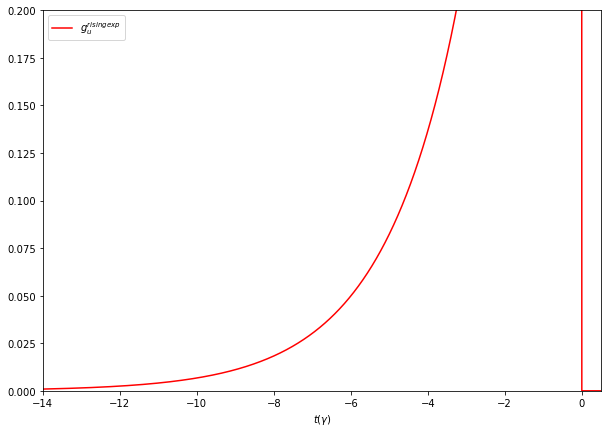

In [5]:
fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(10)

#tlist = np.linspace(-7.5, 0, 100000)
g_u_rexp_list = [g_u_rising_exp(t, {'GAMMA':1,'t0':0}) for t in tlist]
print(max(g_u_rexp_list))

ax.plot(tlist, g_u_rexp_list, '-r', label='$g_{u}^{rising exp}$')

ax.set_xlim(tlist[0], tlist[-1])
ax.set_xlabel('$t(\gamma)$')
ax.set_ylim(0,0.2)
ax.legend()

plt.show()

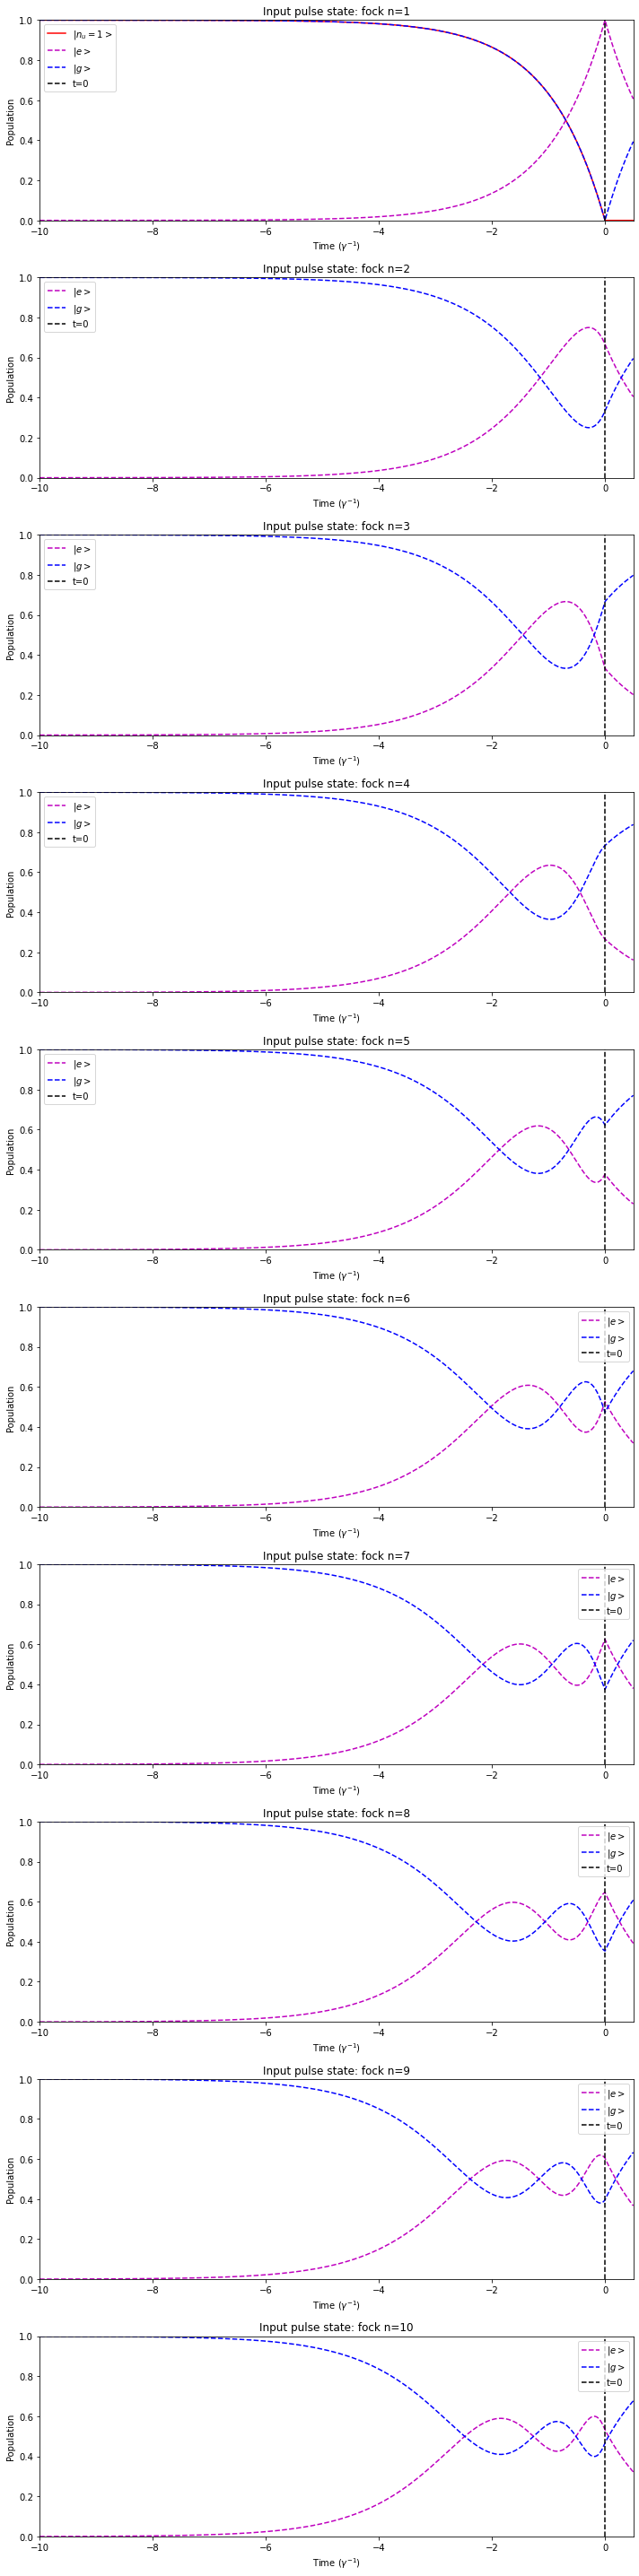

In [7]:
fig, ax = plt.subplots(10,figsize=(10,40))
#fig.set_figheight(7)
#fig.set_figwidth(10)
source_dir = "../../outputs/rising_exp/"

for i,axes in zip(range(1,11,1),ax):
    if i==1:
        in_one_photon = np.loadtxt(source_dir+"pop/fock_"+str(i)+"/precision_0.001/input_one_photon.dat")
        axes.plot(tlist, in_one_photon, '-r', label='$|n_{u}=1>$')
    excited_atom = np.loadtxt(source_dir+"pop/fock_"+str(i)+"/precision_0.001/excited_atom.dat")
    gs_atom = np.loadtxt(source_dir+"pop/fock_"+str(i)+"/precision_0.001/gs_atom.dat")
    if i==8:
        precision=1e-3
        gamma = 1
        t_stop=0.5
        t_start=-10
        dt = precision / gamma
        steps = int((t_stop - t_start) / dt)
        tlist = np.linspace(t_start, t_stop, steps)
    if i==9:
        precision=1e-3
        gamma = 1
        t_stop=0.5
        t_start=-14
        dt = precision / gamma
        steps = int((t_stop - t_start) / dt)
        tlist = np.linspace(t_start, t_stop, steps)
        
    axes.plot(tlist, excited_atom, '--m', label='$|e>$')
    axes.plot(tlist, gs_atom, '--b', label='$|g>$')
    axes.set_xlim(-10,tlist[-1])
    axes.set_xlabel('Time ($\gamma^{-1}$)')
    axes.vlines(0,0,1,'k','dashed',label='t=0')

    axes.set_ylim(0,1)
    axes.set_ylabel('Population')
    axes.set_title('Input pulse state: fock n='+str(i))
    axes.legend()

plt.tight_layout()
plt.show()

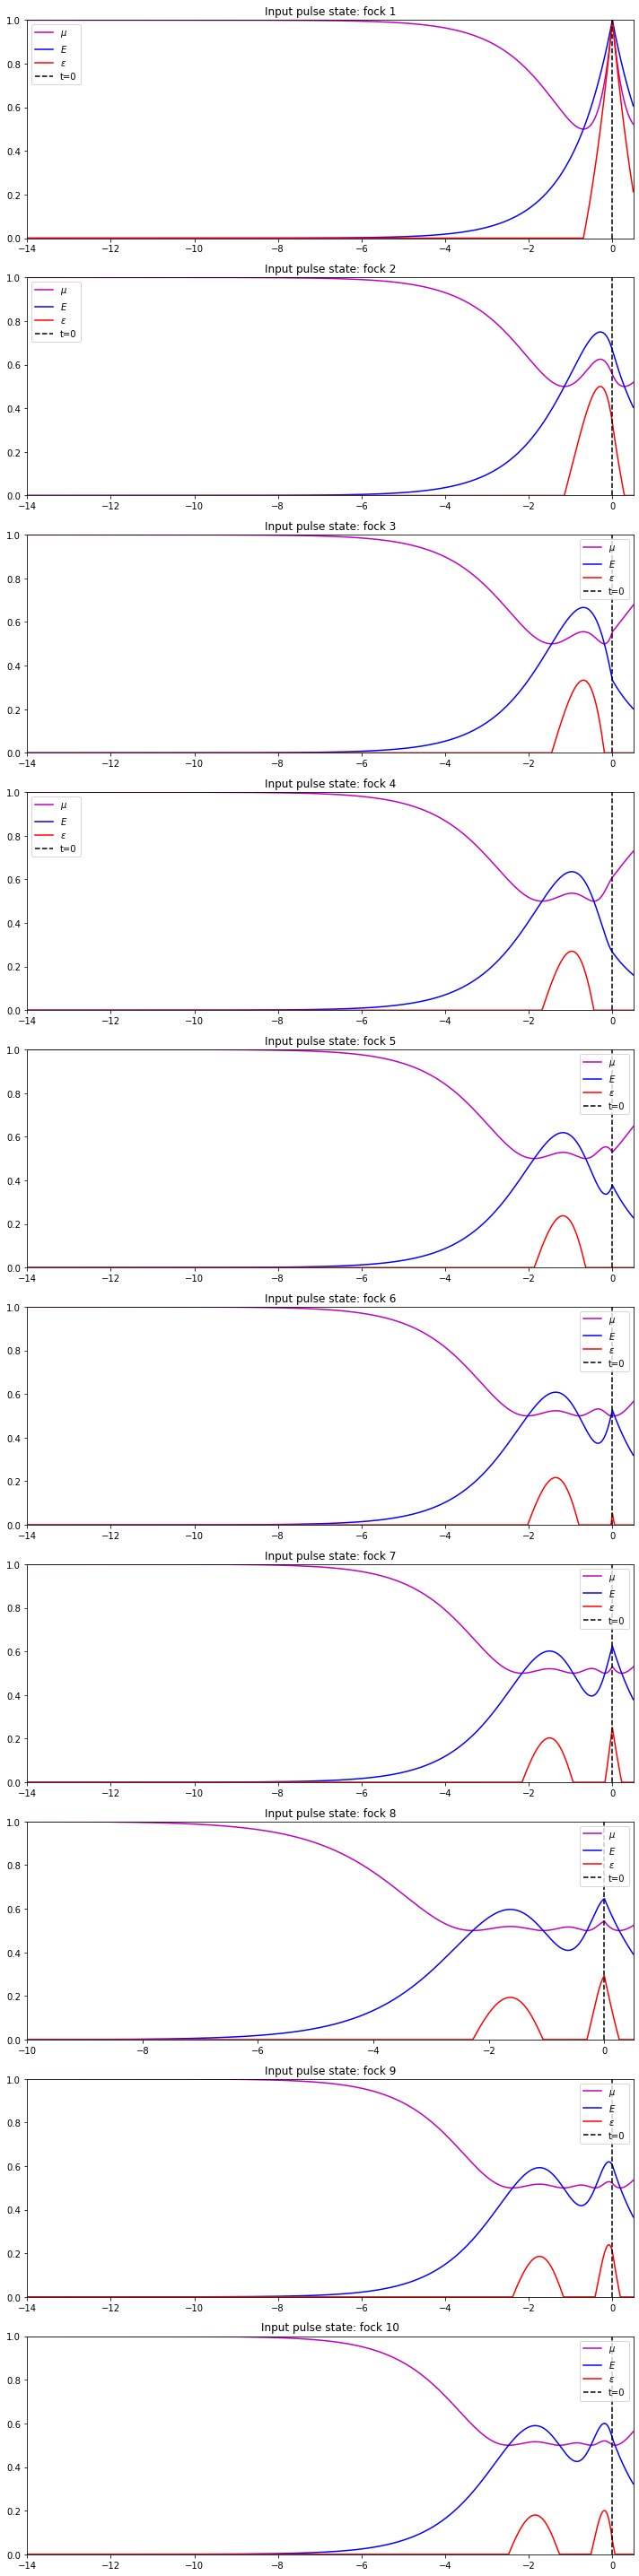

In [8]:
fig, ax = plt.subplots(10,figsize=(10,40))
#fig.set_figheight(7)
#fig.set_figwidth(10)
source_dir = "../../outputs/rising_exp/time/"

for i,axes in zip(range(1,11,1),ax):
    pur = np.loadtxt(source_dir + 
                          "fock_"+str(i)+"/precision_0.001/purity.dat")
    erg = np.loadtxt(source_dir + 
                          "fock_"+str(i)+"/precision_0.001/ergotropy.dat")
    ene = np.loadtxt(source_dir + 
                          "fock_"+str(i)+"/precision_0.001/energy.dat")
    axes.plot(pur[:,0], pur[:,1], '-m', label='$\mu$')
    axes.plot(ene[:,0], ene[:,1], '-b', label='$E$')
    axes.plot(erg[:,0], erg[:,1], '-r', label='$\epsilon$')
    axes.vlines(0,0,1,'k','dashed',label='t=0')

    axes.set_xlim(erg[:,0][0],erg[:,0][-1])
    axes.set_ylim(0,1)

    axes.set_title("Input pulse state: fock " + str(i))

    axes.legend()

plt.tight_layout()
plt.show()

In [9]:
def mean_power(_ef, _tf, _ei=0., _ti=0.):
    """
    Return the ratio (_ef-_ei)/(_tf-_ti), which is the mean power
    """
    de = float(_ef - _ei)
    dt = float(_tf - _ti)
    if de == 0:
        return 0
    else:
        return de / dt

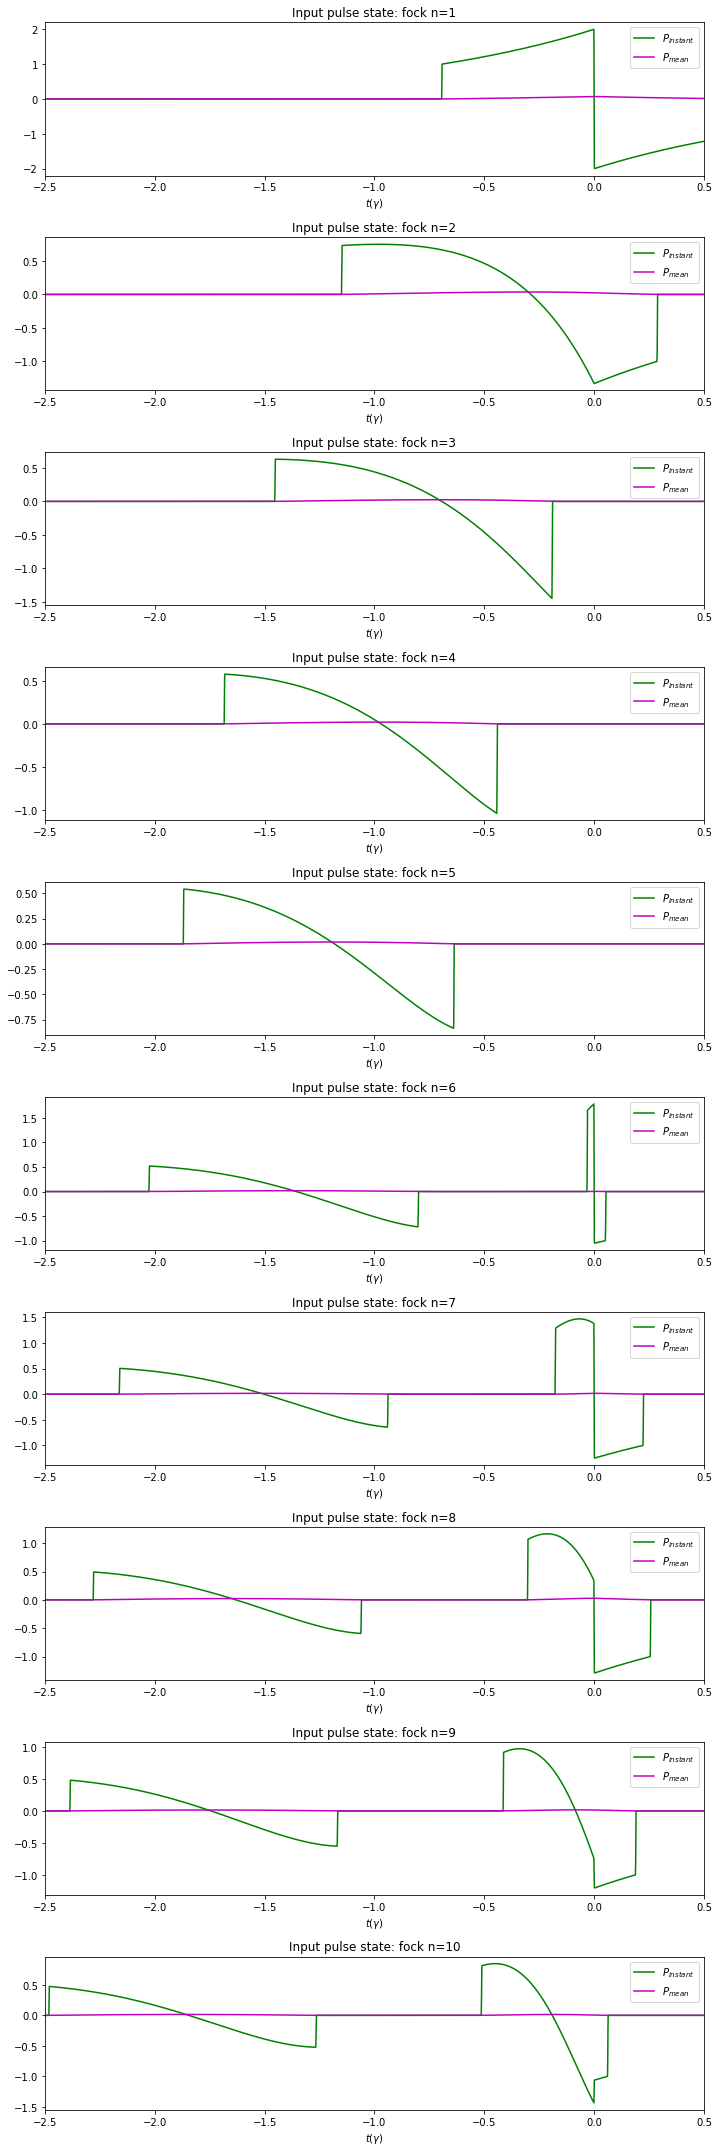

In [11]:
source_dir = "../../outputs/rising_exp/time/"

fig, ax = plt.subplots(10, figsize=(10,30))
#fig.set_figheight(7)
#fig.set_figwidth(10)

instant_pow = []
mean_pow = []
for i in range(1,11):
    erg = np.loadtxt(source_dir+"fock_" + str(i) + "/precision_0.001/ergotropy.dat")
    mean_pow.append([mean_power(ef,tf,erg[:,1][0],erg[:,0][0]) for ef,tf in zip(erg[:,1],erg[:,0])])
    # Calculate the numerical derivative
    # np.gradient uses the central slope, so it is more precise
    dt = erg[:,0][-1] - erg[:,0][-2]
    instant_pow.append(np.gradient(erg[:,1], dt))

for i, axes in zip(range(0,10),ax):
    if i==7:
        precision=1e-3
        gamma = 1
        t_stop=0.5
        t_start=-10
        dt = precision / gamma
        steps = int((t_stop - t_start) / dt)
        tlist = np.linspace(t_start, t_stop, steps)
    if i==8:
        precision=1e-3
        gamma = 1
        t_stop=0.5
        t_start=-14
        dt = precision / gamma
        steps = int((t_stop - t_start) / dt)
        tlist = np.linspace(t_start, t_stop, steps)
    axes.plot(tlist,instant_pow[i],'-g',label='$P_{instant}$')
    axes.plot(tlist,mean_pow[i],'-m',label='$P_{mean}$')
    axes.set_xlabel('$t(\gamma)$')
    axes.set_xlim(-2.5,0.5)
    axes.set_title('Input pulse state: fock n='+str(i+1))
    axes.legend()

plt.tight_layout()
plt.show()